# Implementasi dan Pengujian ConvexHull

## 1. Pustaka myConvexHull

In [6]:
import math

def CheckLocation(p1, p2, p3):
    """
    Mengembalikan hasil perhitungan determinan dari 3 titik. 
    Fungsi memeriksa apakah titik p3 berada di sebelah kiri atau 
    sebelah kanan suatu garis yang dibentuk oleh p1 dan p2.
    """
    return p1[0] * p2[1] + p3[0] * p1[1] + p2[0] * p3[1] - p3[0] * p2[1] - p2[0] * p1[1] - p1[0] * p3[1]

def DivideArea(p1, pn, S, S1, S2):
    """
    I.S.: S1 dan S2 belum terdefinisi
    I.F.: S1 berisi titik yang berada di bagian kiri dari garis yang dibentuk oleh p1 dan pn. S2 berisi titik yang berada di bagian kanan dari garis yang dibentuk oleh p1 dan pn.
    """
    for p in S:
        det = CheckLocation(p1, pn, p)
        if det > 0:
            S1.append(p)
        elif det < 0:
            S2.append(p)


def Angle(d1, d2):
    """
    Mengembalikan nilai sudut yang diapit dari garis d1 dan d2.
    """
    if(d1 == 0 or d2 == 0):
        return 0
    else:
        if(d1 > d2):
            return math.acos(d2/d1)
        else:
            return math.acos(d1/d2)


def FurthestDistance(S, p1, pn):
    """
    Mengembalikan titik yang memiliki jarak terjauh dari p1 dan pn.
    """
    maxd1 = math.dist(S[0], p1)
    maxd2 = math.dist(S[0], pn)
    index = 0
    for i in range(1, len(S)):
        d1 = math.dist(S[i], p1)
        d2 = math.dist(S[i], pn)
        if (d1 + d2 > maxd1 + maxd2):
            index = i
            maxd1 = d1
            maxd2 = d2
        elif (d1 + d2 == maxd1 + maxd2):
            if (Angle(d1, d2) > Angle(maxd1, maxd2)):
                index = i
                maxd1 = d1
                maxd2 = d2
    return S.pop(index)


def ConvexHull(S):
    """
    Fungsi utama pembuatan Convex Hull dengan algoritma Divide and Conquer
    """
    hull = []
    S1 = []
    S2 = []
    S = sorted(S, key=lambda k: [k[0], k[1]])
    p1 = S.pop(0)
    pn = S.pop(-1)
    for p in S:
        det = CheckLocation(p1, pn, p)
        if det > 0:
            S1.append(p)
        elif det < 0:
            S2.append(p)
    FindHull(S1, p1, pn, hull)
    FindHull(S2, pn, p1, hull)
    return hull


def FindHull(S, p1, pn, hull):
    """
    I.S.: S berisi titik yang berada di bagian kiri atau kanan dari garis yang dibentuk oleh p1 dan pn.
    F.S.: hull berisi titik-titik terluar yang membentuk Convex Hull dari S.
    """
    if(len(S) == 0):
        hull.append([p1, pn])
    else:
        S1 = []
        S2 = []
        pmax = FurthestDistance(S, p1, pn)
        for p in S:
            det1 = CheckLocation(p1, pmax, p)
            if det1 > 0:
                S1.append(p)
            det2 = CheckLocation(pmax, pn, p)
            if det2 > 0:
                S2.append(p)
        FindHull(S1, p1, pmax, hull)
        FindHull(S2, pmax, pn, hull)

## 2. Visualisasi Data
### Data Set Iris

### Petal-length vs Petal-width

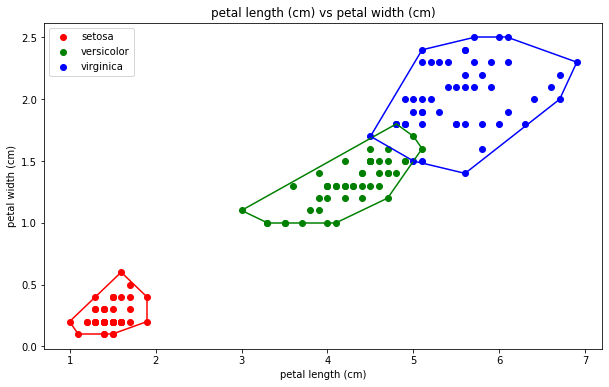

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myConvexHull import ConvexHull
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
plt.figure(figsize=(10, 6))
plt.title(data.feature_names[2] + ' vs ' + data.feature_names[3])
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:, [2, 3]].values
  hull = ConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color=colors[i])
  for simplex in hull:
    x = [simplex[0][0], simplex[1][0]]
    y = [simplex[0][1], simplex[1][1]]
    plt.plot(x, y, color=colors[i])
plt.legend()


### sepal length vs sepal width

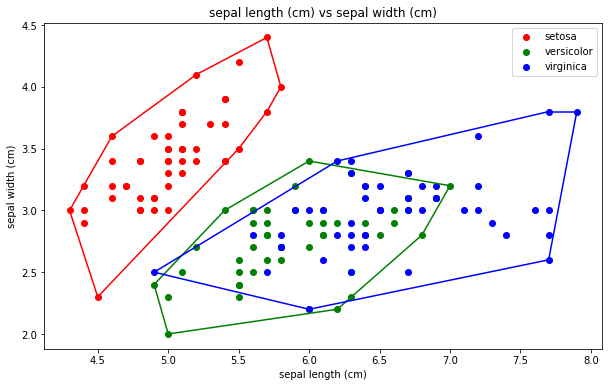

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myConvexHull import ConvexHull
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
plt.figure(figsize=(10, 6))
plt.title(data.feature_names[0] + ' vs ' + data.feature_names[1])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:, [0, 1]].values
  hull = ConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color=colors[i])
  for simplex in hull:
    x = [simplex[0][0], simplex[1][0]]
    y = [simplex[0][1], simplex[1][1]]
    plt.plot(x, y, color=colors[i])
plt.legend()

### Data Set Digits

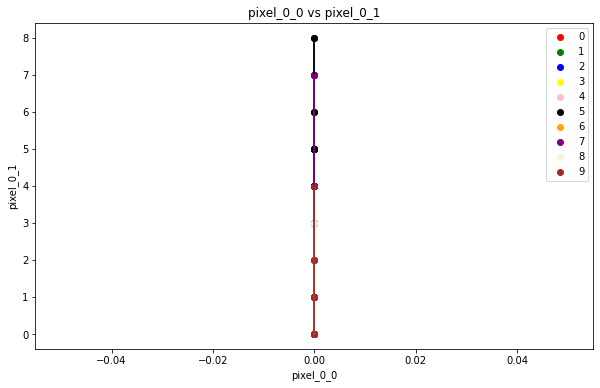

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
plt.figure(figsize=(10, 6))
plt.title(data.feature_names[0] + ' vs ' + data.feature_names[1])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:, [0, 1]].values
  hull = ConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color=colors[i])
  for simplex in hull:
    x = [simplex[0][0], simplex[1][0]]
    y = [simplex[0][1], simplex[1][1]]
    plt.plot(x, y, color=colors[i])
plt.legend()